Evaluating NLP models and conducting error analysis are critical steps to ensure the effectiveness and robustness of any natural language processing (NLP) application. This section focuses on methods to evaluate chunking, named entity recognition (NER), and relation extraction models, along with techniques for analyzing and improving performance based on observed errors. The evaluation and error analysis process helps in optimizing models, identifying areas of improvement, and making informed decisions about model enhancements.



### 9.1 Importance of Evaluation and Error Analysis

- **Model Validation**: Evaluation helps determine the accuracy and reliability of the NLP models in handling real-world text, thus ensuring that they meet the desired performance metrics.
- **Error Identification**: Error analysis is crucial to identify shortcomings, such as ambiguities and misclassifications, in order to implement strategies that enhance model quality.
- **Continuous Improvement**: Effective error analysis allows for iterative improvements, enabling the model to adapt better to the target domain.



### 9.2 Evaluation Metrics

#### 9.2.1 Precision, Recall, and F1-Score

- **Precision**: Measures the proportion of correctly predicted chunks/entities that are relevant. Precision is important when false positives are costly.
  - **Formula**:
    

- **Recall**: Measures the proportion of relevant chunks/entities that are correctly predicted. High recall is important when missing relevant items has serious consequences.
  - **Formula**:

- **F1-Score**: The harmonic mean of precision and recall, providing a balanced metric to evaluate models when precision and recall are equally important.
  - **Formula**:
    



- **Code Demonstration**: Calculating precision, recall, and F1-score for a sample set using scikit-learn.


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score  # Importing the necessary metrics.

# True labels (ground truth) for a classification task.
# These could represent syntactic tags for sentence structures (e.g., NP = Noun Phrase, VP = Verb Phrase, PP = Prepositional Phrase).
y_true = ["NP", "VP", "NP", "PP", "NP"]

# Predicted labels output by a model, which will be compared against the true labels.
y_pred = ["NP", "VP", "PP", "PP", "NP"]

# Calculating precision using the micro-averaging method.
# Precision = True Positives / (True Positives + False Positives).
# Micro-averaging computes precision globally across all instances (not class-wise).
precision = precision_score(y_true, y_pred, average='micro')

# Calculating recall using the micro-averaging method.
# Recall = True Positives / (True Positives + False Negatives).
# Micro-averaging sums up contributions from all classes and computes recall across all instances.
recall = recall_score(y_true, y_pred, average='micro')

# Calculating the F1-score using the micro-averaging method.
# F1 Score = 2 * (Precision * Recall) / (Precision + Recall).
# Like precision and recall, this metric is calculated globally across all instances using micro-averaging.
f1 = f1_score(y_true, y_pred, average='micro')

# Printing precision, recall, and F1 score, formatted to two decimal places.
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


Precision: 0.80, Recall: 0.80, F1 Score: 0.80


#### 9.2.2 Confusion Matrix

- **Definition**: A confusion matrix is a table used to describe the performance of a classification model by showing the counts of true positives, true negatives, false positives, and false negatives.
- **Usage**: Helps identify patterns in errors, such as systematic misclassification of certain chunks or entities.
- **Code Demonstration**: Use scikit-learn to generate a confusion matrix for chunk classification.


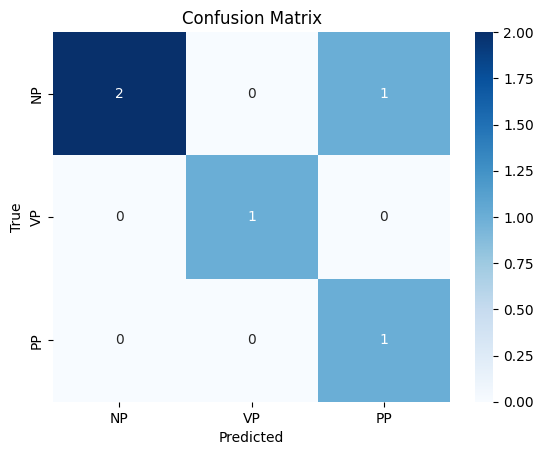

In [ ]:
from sklearn.metrics import confusion_matrix  # Importing confusion matrix function from sklearn.
import seaborn as sns  # Importing Seaborn for visualization.
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting.

# True labels for the classification task, representing syntactic tags (e.g., NP = Noun Phrase, VP = Verb Phrase, PP = Prepositional Phrase).
y_true = ["NP", "VP", "NP", "PP", "NP"]

# Predicted labels from a model, which will be compared to the true labels.
y_pred = ["NP", "VP", "PP", "PP", "NP"]

# Creating the confusion matrix.
# The 'labels' parameter ensures the order of labels in the confusion matrix (NP, VP, PP).
cm = confusion_matrix(y_true, y_pred, labels=["NP", "VP", "PP"])

# Visualizing the confusion matrix using Seaborn's heatmap.
# - annot=True shows the values inside the matrix cells.
# - cmap="Blues" sets the color map for the heatmap.
# - xticklabels and yticklabels define the labels for the x (predicted) and y (true) axes.
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=["NP", "VP", "PP"], yticklabels=["NP", "VP", "PP"])

# Adding labels and a title to the plot.
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Displaying the heatmap.
plt.show()


#### 9.2.3 Accuracy

- **Definition**: Accuracy is the ratio of correctly predicted instances to the total instances. Although it is a common metric, it may not always be suitable, especially for imbalanced datasets.

- **Limitations**: For imbalanced datasets, accuracy may be misleading since it does not account for class distribution. Precision and recall should also be considered.



#### 9.2.4 ROC-AUC (Receiver Operating Characteristic - Area Under Curve)

- **Definition**: ROC-AUC is a metric used to evaluate the performance of binary classifiers. It measures the trade-off between true positive rates and false positive rates.
- **Usage**: It is particularly useful for assessing model performance when the dataset is imbalanced.
- **Code Demonstration**: Example for generating an ROC curve using scikit-learn.


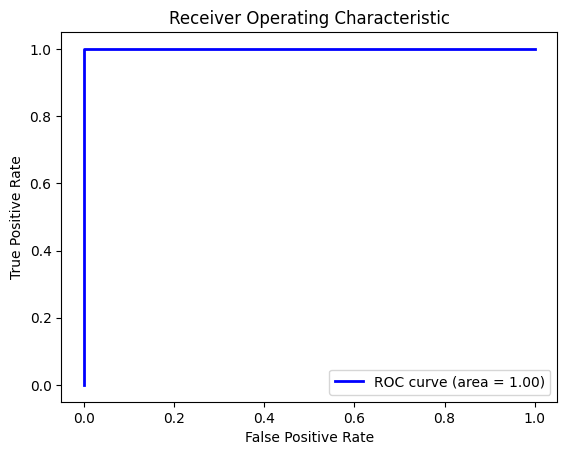

In [ ]:
from sklearn.metrics import roc_curve, auc  # Importing functions to calculate ROC curve and AUC.
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting.

# Binary ground truth labels (0 = negative, 1 = positive).
y_true_binary = [0, 1, 1, 0, 1]

# Predicted scores (e.g., probabilities) for each instance. These are not hard predictions (0/1), but confidence scores.
y_scores = [0.2, 0.8, 0.6, 0.3, 0.9]

# Calculating the false positive rate (fpr), true positive rate (tpr), and thresholds using roc_curve.
# The roc_curve function requires the ground truth labels and the predicted scores.
fpr, tpr, _ = roc_curve(y_true_binary, y_scores)

# Calculating the area under the ROC curve (AUC), which gives a single scalar value summarizing the ROC performance.
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve using Matplotlib.
# - fpr (x-axis) represents the false positive rate.
# - tpr (y-axis) represents the true positive rate.
# - The AUC value is displayed in the plot legend.
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

# Adding labels and title to the plot.
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")

# Displaying the legend at the lower right corner.
plt.legend(loc="lower right")

# Showing the ROC plot.
plt.show()


### 9.3 Error Analysis Techniques



#### 9.3.1 Manual Review

- **Definition**: Manually reviewing a sample of the model’s output can provide insights into specific types of errors the model is making.
- **Usage**: Useful for identifying patterns of failure, such as entities consistently misclassified or wrongly segmented phrases.
- **Procedure**: Randomly select samples of predictions and compare them with the true labels to categorize common errors.



#### 9.3.2 Categorizing Errors

- **Systematic Errors**: Errors that occur consistently due to incorrect patterns learned by the model, such as consistent misclassification of noun phrases as prepositional phrases.
- **Random Errors**: Errors without an apparent pattern, which might require more training data or enhanced feature engineering to resolve.
- **Code Demonstration**: Categorize errors in predictions using Python.



In [ ]:
# Creating a list of tuples where the true and predicted labels are different (i.e., errors).
# zip(y_true, y_pred) pairs up each true label with its corresponding predicted label.
# The list comprehension filters out correct predictions, keeping only the ones where true != predicted.
errors = [(true, pred) for true, pred in zip(y_true, y_pred) if true != pred]

# Iterating over each misclassification and printing the true and predicted labels.
for error in errors:
    print(f"True: {error[0]}, Predicted: {error[1]}")


True: NP, Predicted: PP


#### 9.3.3 Error Distribution Analysis

- **Definition**: Analyzing the distribution of errors across different classes or entity types to understand where the model struggles the most.
- **Application**: Helps in understanding whether certain entity types or chunk classes are more prone to errors.
- **Visualization**: Use bar charts to visualize the frequency of errors for different classes.


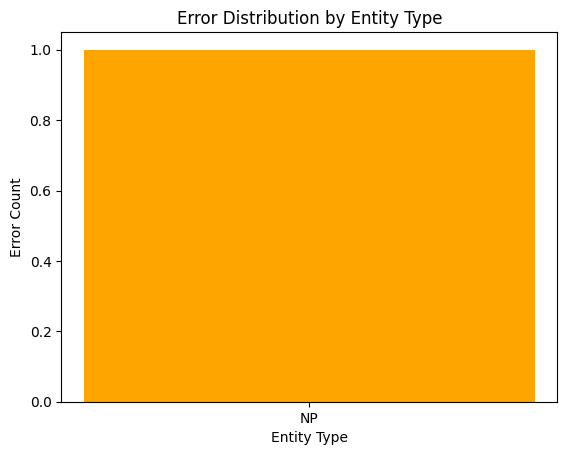

In [ ]:
from collections import Counter  # Importing Counter to count occurrences of each error class.
import matplotlib.pyplot as plt  # Importing Matplotlib to create visualizations.

# Extracting the true labels (entity types) from the misclassified examples.
# 'errors' is a list of (true, predicted) pairs where the model made incorrect predictions.
error_classes = [true for true, pred in errors]

# Counting the number of occurrences of each entity type in the error list using Counter.
# This will show how many times the model made errors for each entity type.
error_counts = Counter(error_classes)

# Creating a bar plot to visualize the error distribution by entity type.
# error_counts.keys() provides the unique entity types, and error_counts.values() gives the corresponding error counts.
plt.bar(error_counts.keys(), error_counts.values(), color='orange')

# Adding labels and title to the plot.
plt.xlabel("Entity Type")
plt.ylabel("Error Count")
plt.title("Error Distribution by Entity Type")

# Displaying the bar chart.
plt.show()


### 9.4 Strategies for Model Improvement



#### 9.4.1 Feature Engineering

- **Enhanced Feature Extraction**: Extract more informative features, such as word embeddings, dependency relations, and context windows, to help the model make better predictions.
- **Feature Selection**: Identify and select the most relevant features using techniques like Recursive Feature Elimination (RFE) to improve model performance.



#### 9.4.2 Data Augmentation

- **Definition**: Increase the size of the training data by creating variations, such as paraphrasing sentences or adding synthetic examples.
- **Impact**: Improves the model's ability to generalize and reduces overfitting, especially when the training dataset is small.



#### 9.4.3 Hyperparameter Tuning

- **Grid Search and Random Search**: Use hyperparameter tuning techniques to find the best combination of parameters that result in optimal model performance.
- **Code Demonstration**: Using GridSearchCV to tune hyperparameters.


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold  # Importing GridSearchCV and KFold for cross-validation.
from sklearn.svm import SVC  # Importing the Support Vector Classifier (SVC).

# Defining the parameters for hyperparameter tuning.
# - 'kernel': Specifies whether to use a linear or RBF kernel.
# - 'C': Regularization parameter with values of 1 and 10 to be tested.
parameters = {'kernel': ('linear', 'rbf'), 'C': [1, 10]}

# Initializing a Support Vector Classifier (SVC) model.
svc = SVC()

# Creating a KFold cross-validator with 5 splits.
# KFold will divide the data into 5 subsets, where 4 subsets are used for training, and the remaining 1 for validation.
cv = KFold(n_splits=5)

# Using GridSearchCV with KFold cross-validation.
# GridSearchCV will perform hyperparameter tuning using the splits defined by KFold.
clf = GridSearchCV(svc, parameters, cv=cv)

# Sample feature set X and labels y_true.
X = [[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11], [12, 13, 14]]  # Example feature data.

# Training the model using GridSearchCV with KFold cross-validation.
clf.fit(X, y_true)

# Printing the best hyperparameter combination found by the grid search.
print(f"Best Parameters: {clf.best_params_}")


Best Parameters: {'C': 1, 'kernel': 'rbf'}
